In [2]:
%matplotlib inline
import math
import pandas as pd
from tsmom_model import *
import numpy as np
from datetime import datetime
import PPCA_MR as p
import matplotlib.pyplot as plt
import statsmodels.api as sm

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
import pylab
sns.set(font_scale=2)
pylab.rcParams['figure.figsize'] = (24, 18)

# Hand cleansed
Hand cleaned to removed duplicates

In [38]:
def calculate_amihud_liquidity(cleansed):
    volume=load_daily_volume()
    contract_size=load_maps()
    fx=load_fx()
    fx_map=contract_size.to_dict()['Currency']
    tick_map=contract_size.to_dict()['Tick Value']
    fx=fx.resample(rule='d',how='last')
    px=cleansed.resample(rule='d',how='last')
    total_vol=pd.DataFrame()
    for m in cleansed.columns:
        try:
            curr= str(fx_map[m])
            total_vol[m] = (px[m]/fx[curr]*volume[m]*tick_map[m])[:'2016'] 
        except:
            print(m)
    x= (cleansed.pct_change().abs()/ total_vol).resample(rule='m',how='median')
    return x.replace([np.inf, -np.inf,0], np.nan)

In [5]:
cleansed=pd.read_csv('extra_px.csv',parse_dates=['Date'],index_col=0)

In [6]:
v=pd.read_csv('extra_vol.csv',parse_dates=['Date'],index_col=0)
#volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')
volume=v

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


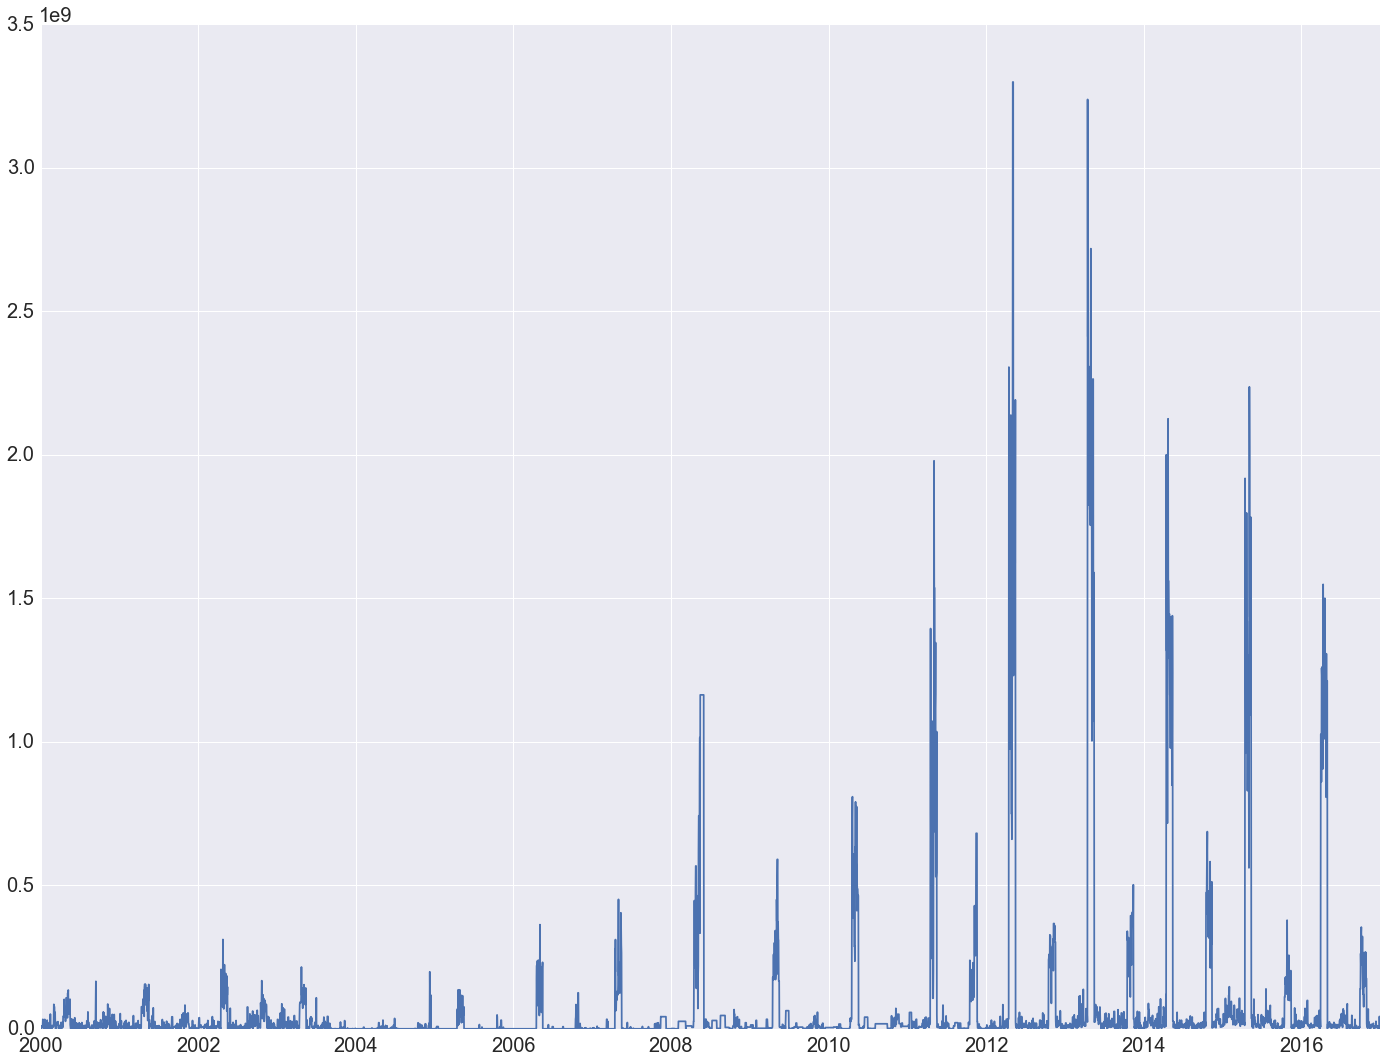

In [52]:
total_vol['ICE-BRENT CRUDE OIL19']['2000':].plot()

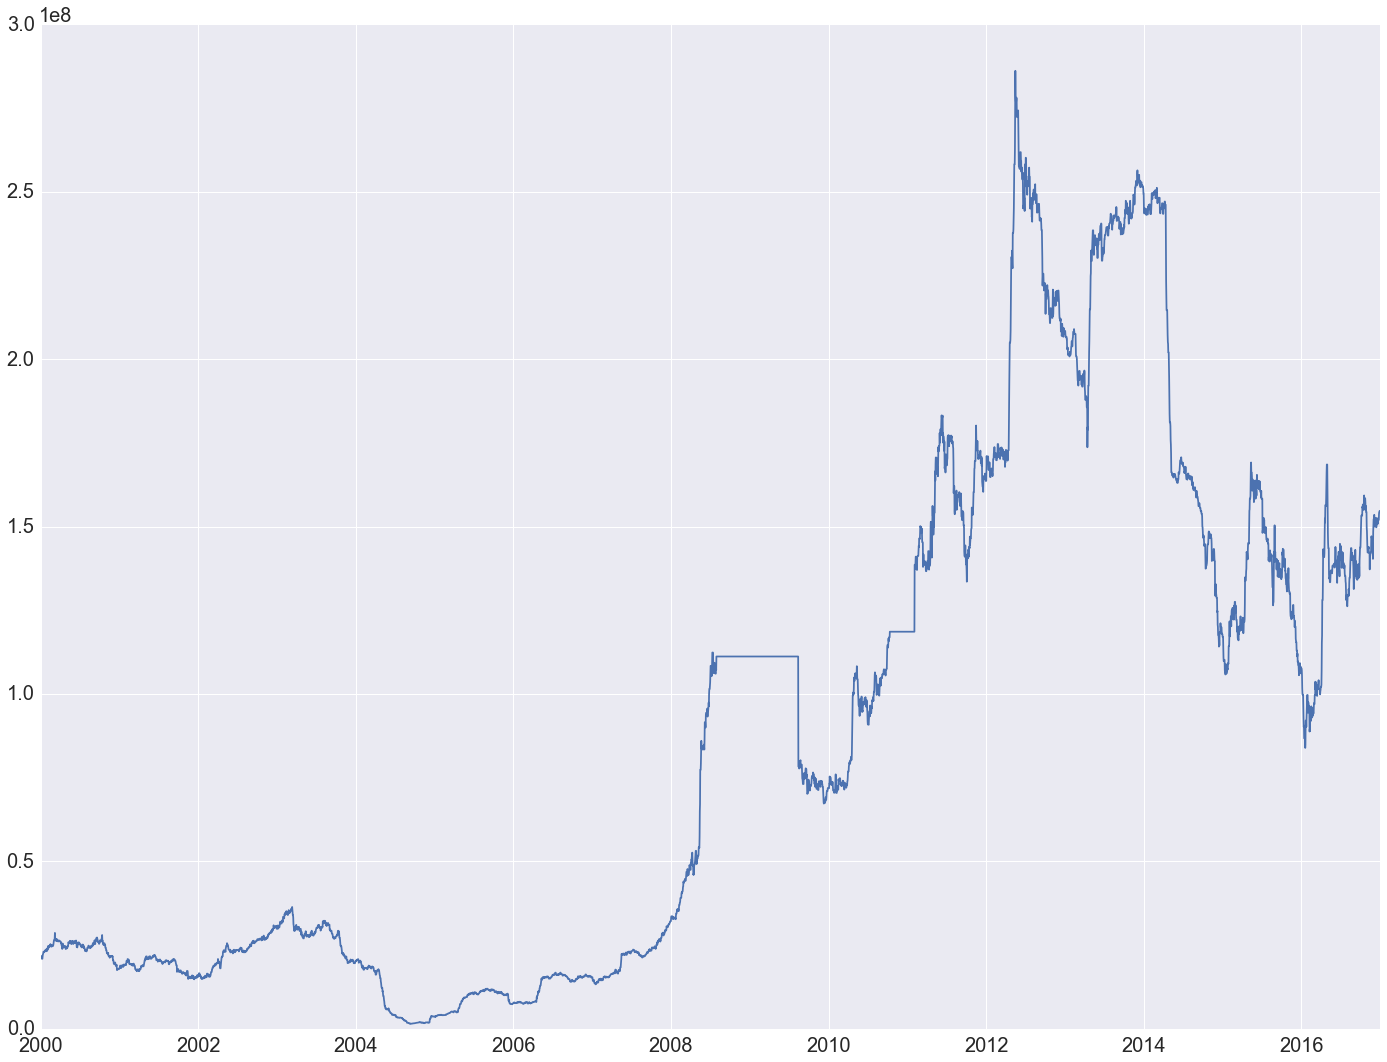

In [50]:
total_vol['ICE-BRENT CRUDE OIL19']['2000':].plot()

In [222]:
#volume=load_daily_volume()
contract_size=load_maps()
fx=load_fx()
fx_map=contract_size.to_dict()['Currency']
tick_map=contract_size.to_dict()['Tick Value']
fx=fx.resample(rule='d',how='last')
px=cleansed.resample(rule='d',how='last')
total_vol=pd.DataFrame()
for m in cleansed.columns:
    try:
        curr= str(fx_map[m])
        #total_vol[m] = (px[m]/fx[curr]*v[m]*tick_map[m])[:'2016'] 
        t = (px[m]/fx[curr]*volume[m]*tick_map[m])[:'2016'] 
        t[t<5e7] = np.nan
        total_vol[m]=t
    except:
        print(m)
x= (cleansed.pct_change().abs()/ total_vol).resample(rule='m',how='median')


    

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()


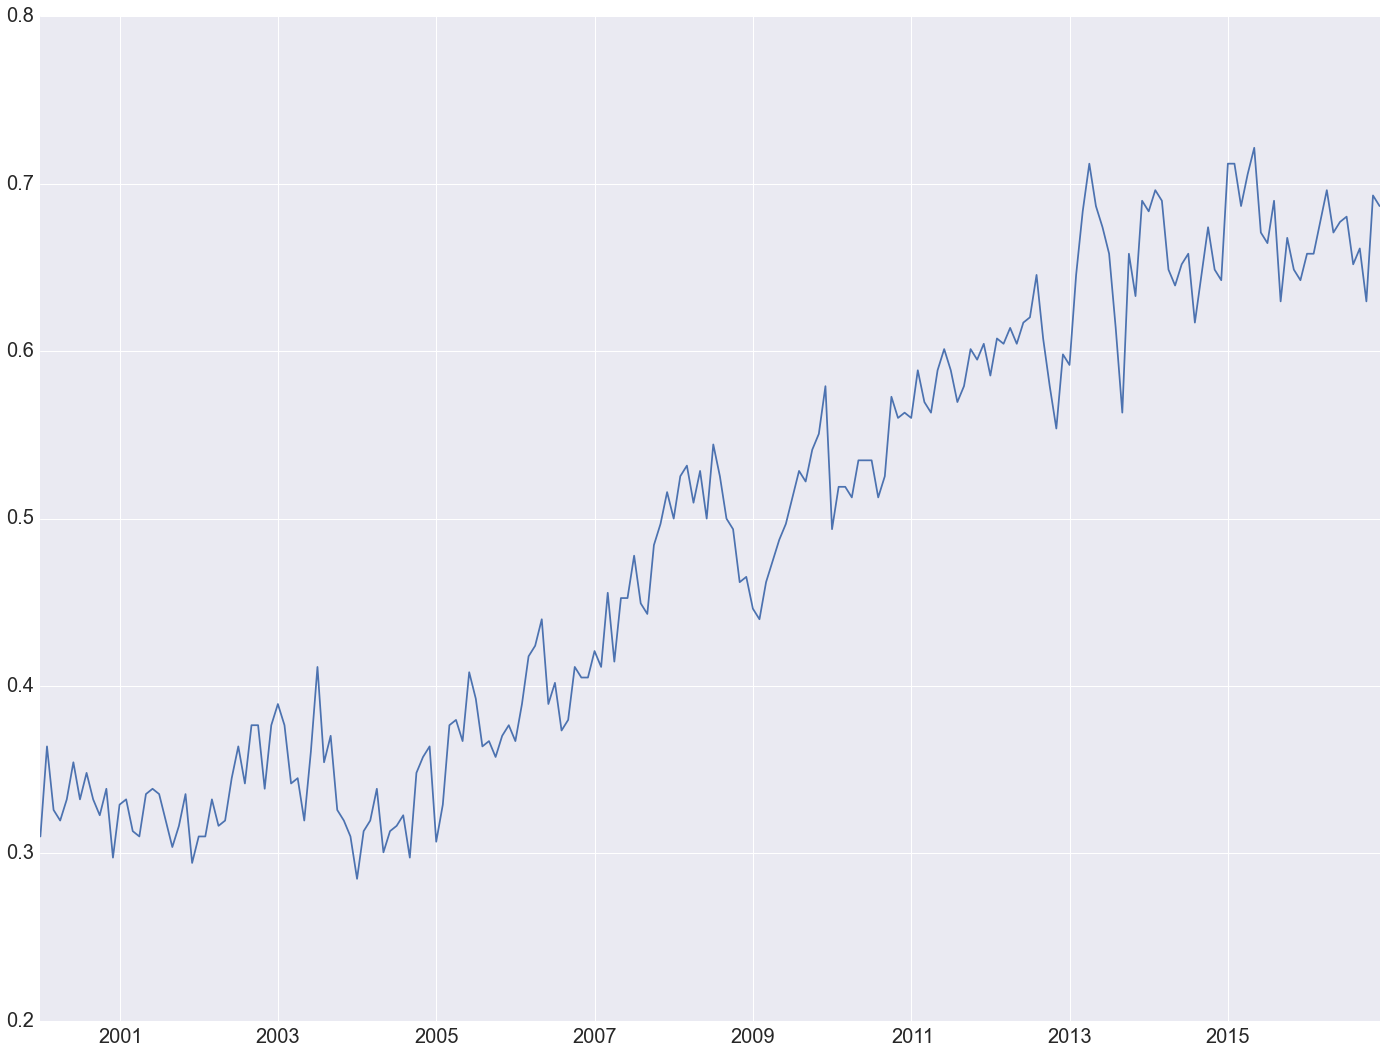

In [223]:
am=amihud['2000':'2016'].T.dropna(how='all').T
(am.count(axis=1)/am.count().count()).plot()

In [224]:
amihud=x.replace([np.inf, -np.inf,0], np.nan)

In [234]:
temp=sector_XS_normalized(amihud['2000':'2016'],with_equity=True)

In [235]:
sectors_amihud={}
for s in temp.keys():
    if len(temp[s]):
        sectors_amihud[s]=temp[s]

In [236]:
sectors_amihud.keys()

['Energies', 'Agriculturals', 'All', 'Metals']

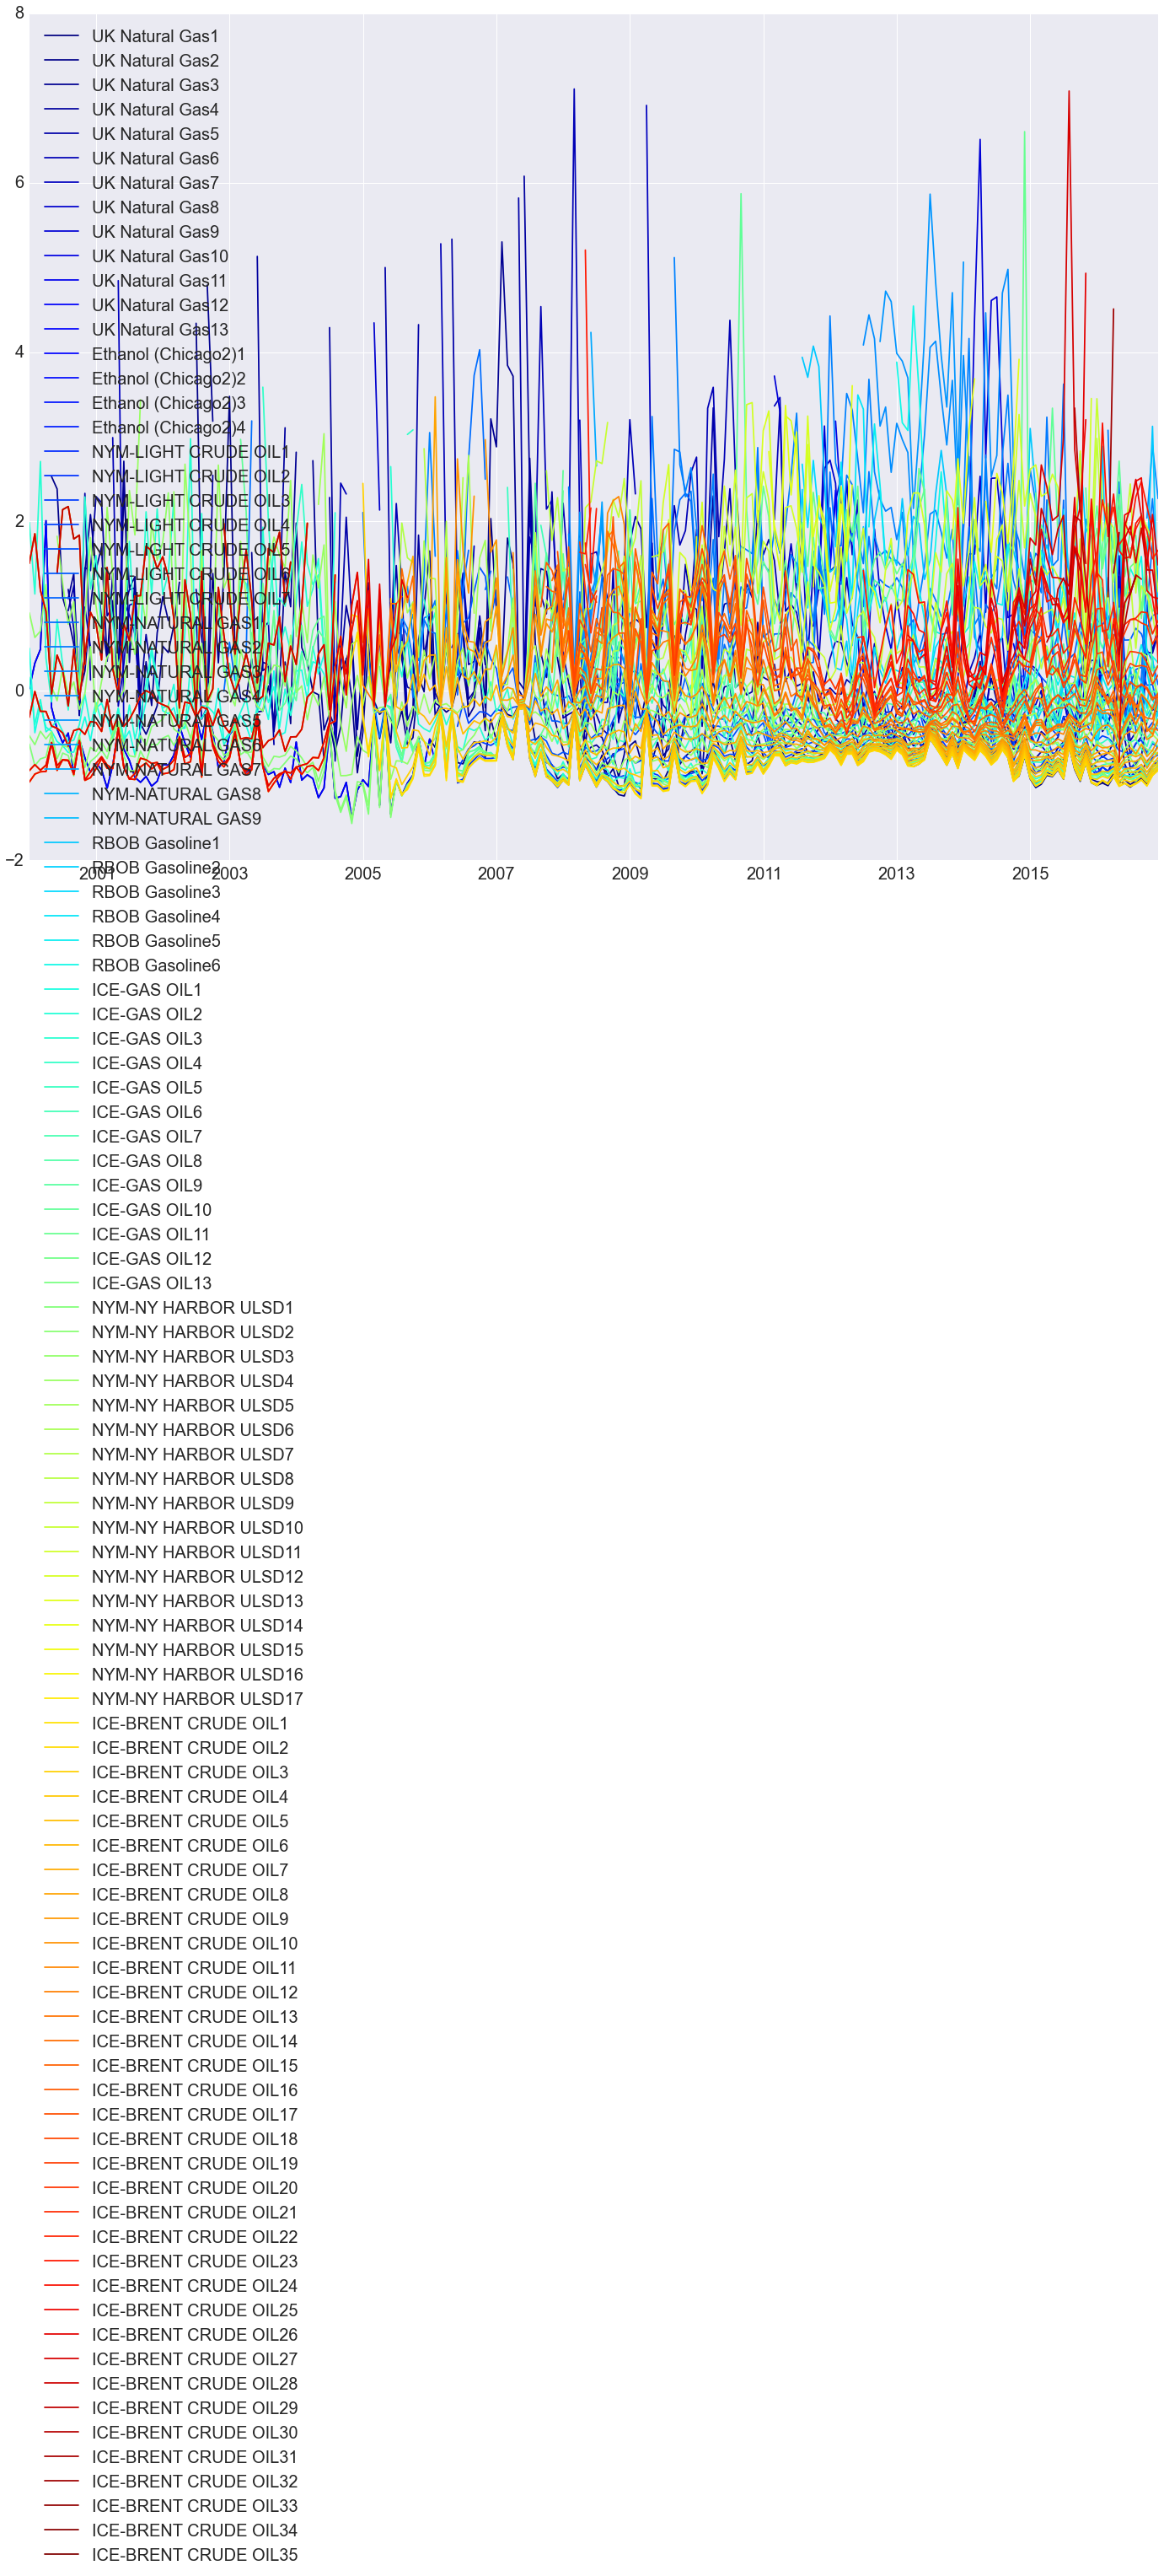

In [237]:
sectors_amihud['Energies'].plot(colormap='jet')

In [229]:
sector_PC={}
sector_variance_explained=pd.DataFrame()

no_pc=3
for sect in sectors_amihud.keys():
    try: 
        PPCA=p.PPCA()
        PPCA.fit(np.array(sectors_amihud[sect]),d=no_pc)
        sector_variance_explained[sect] = PPCA.var_exp
        pcs=pd.DataFrame()
        for i in range(0,no_pc,1):
            x=pd.DataFrame(PPCA.C.T[i]*PPCA.data).sum(axis=1)
            x.set_axis(sectors_amihud[sect].index)
            pcs[i]=x
        sector_PC[sect] = pcs
    except:
        print sect

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  del sys.path[0]


In [230]:
sector_PC.keys()

['Energies', 'Agriculturals', 'All', 'Metals']

In [231]:
tcf=pd.DataFrame()
for s in sector_PC.keys():
    tcf[s]=sector_PC[s].mean(axis=1)

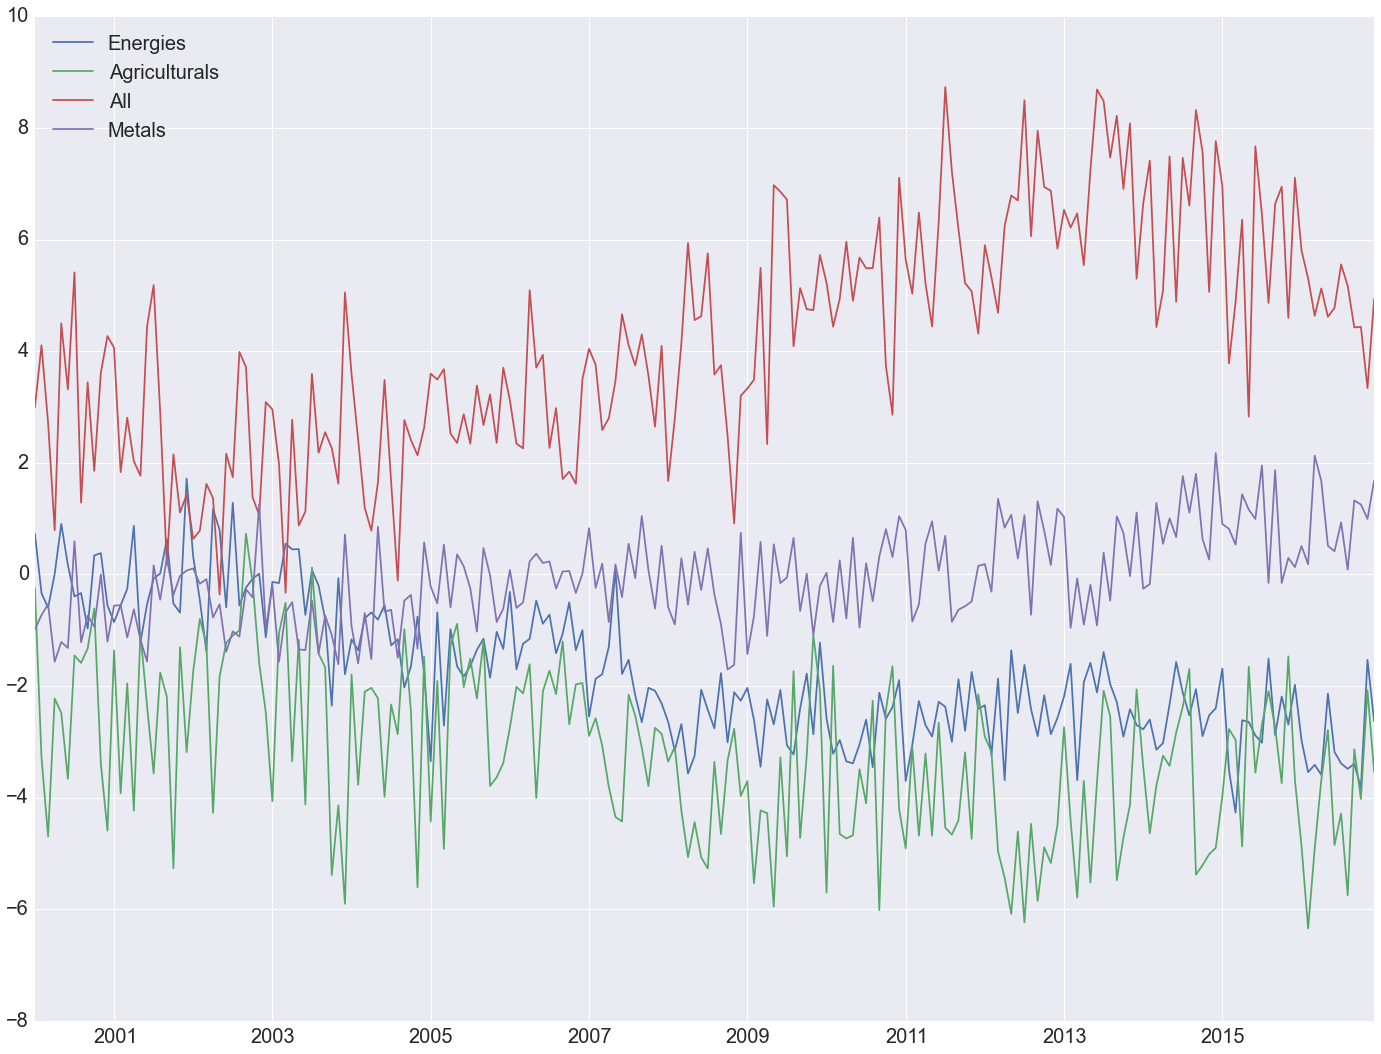

In [232]:
tcf.plot()

In [161]:
FHT_extra=calculate_FHT(cleansed)

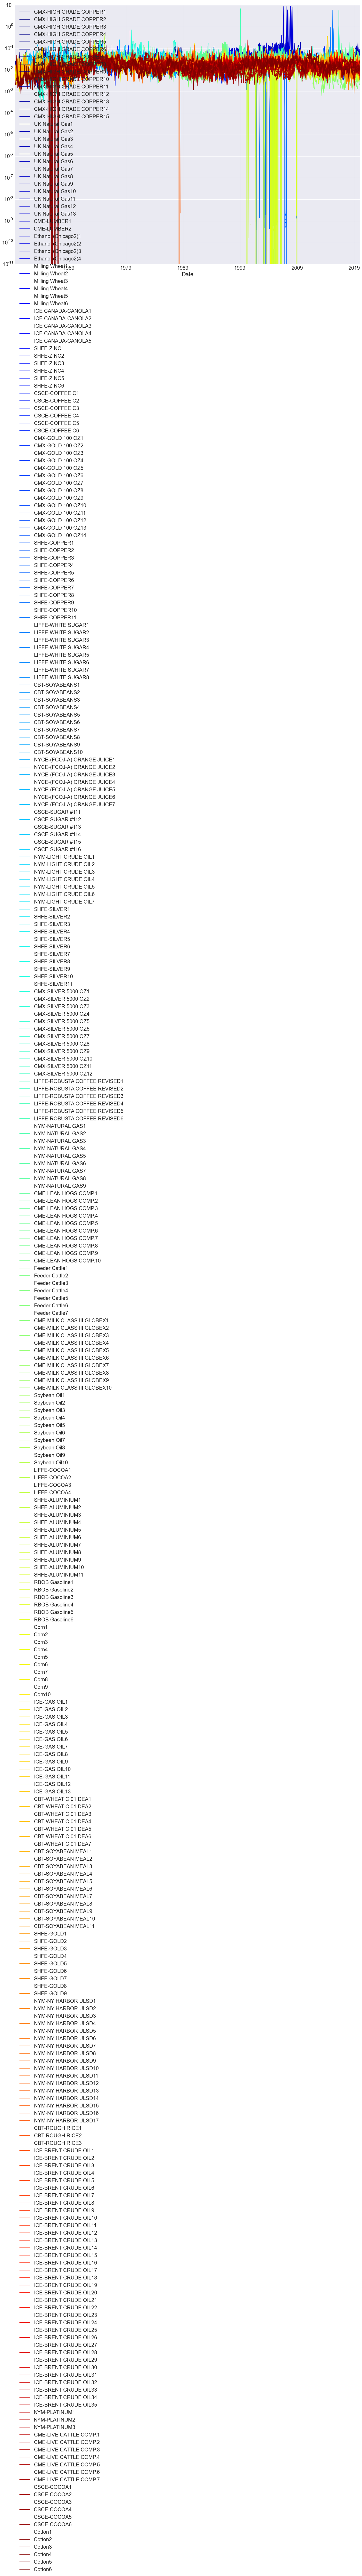

In [162]:
FHT_extra.plot(colormap='jet',logy=True)

In [168]:
temp=sector_XS_normalized(FHT_extra['2000':'2016'],with_equity=True)

In [171]:
sectors_FHT={}
for s in temp.keys():
    if len(temp[s]):
        sectors_FHT[s]=temp[s]

In [173]:
sector_PC_FHT={}
sector_variance_explained=pd.DataFrame()

no_pc=3
for sect in sectors_FHT.keys():
    try: 
        PPCA=p.PPCA()
        PPCA.fit(np.array(sectors_FHT[sect]),d=no_pc)
        sector_variance_explained[sect] = PPCA.var_exp
        pcs=pd.DataFrame()
        for i in range(0,no_pc,1):
            x=pd.DataFrame(PPCA.C.T[i]*PPCA.data).sum(axis=1)
            x.set_axis(sectors_FHT[sect].index)
            pcs[i]=x
        sector_PC_FHT[sect] = pcs
    except:
        print sect

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  del sys.path[0]


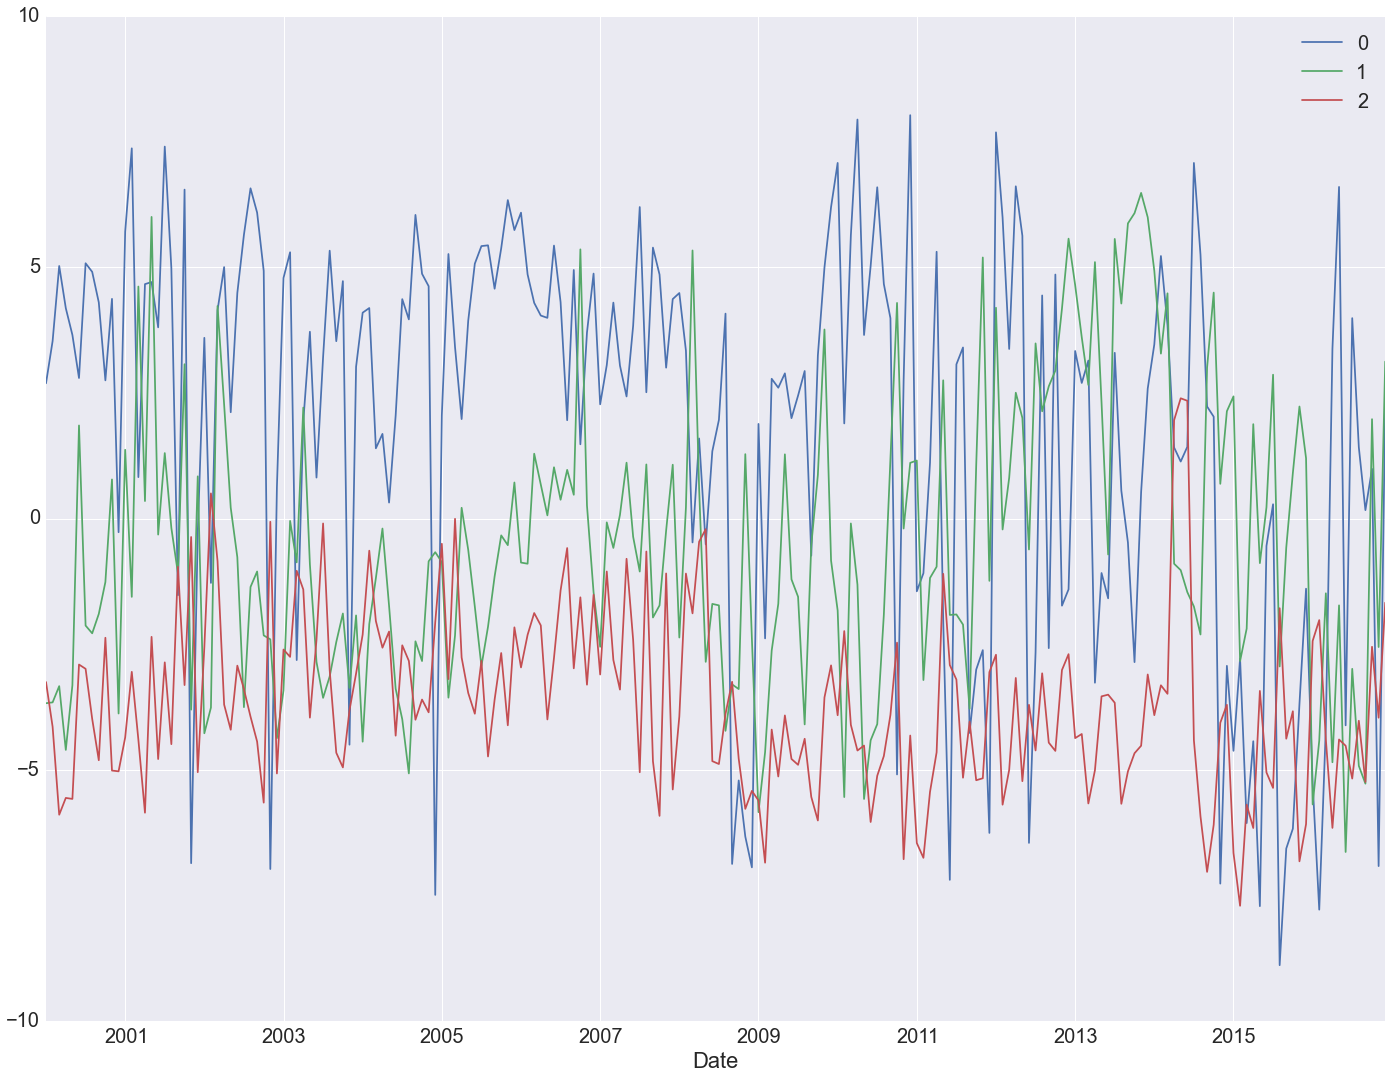

In [175]:
sector_PC_FHT['Energies'].plot()

In [176]:
tcf_fht=pd.DataFrame()
for s in sector_PC_FHT.keys():
    tcf_fht[s]=sector_PC_FHT[s].mean(axis=1)

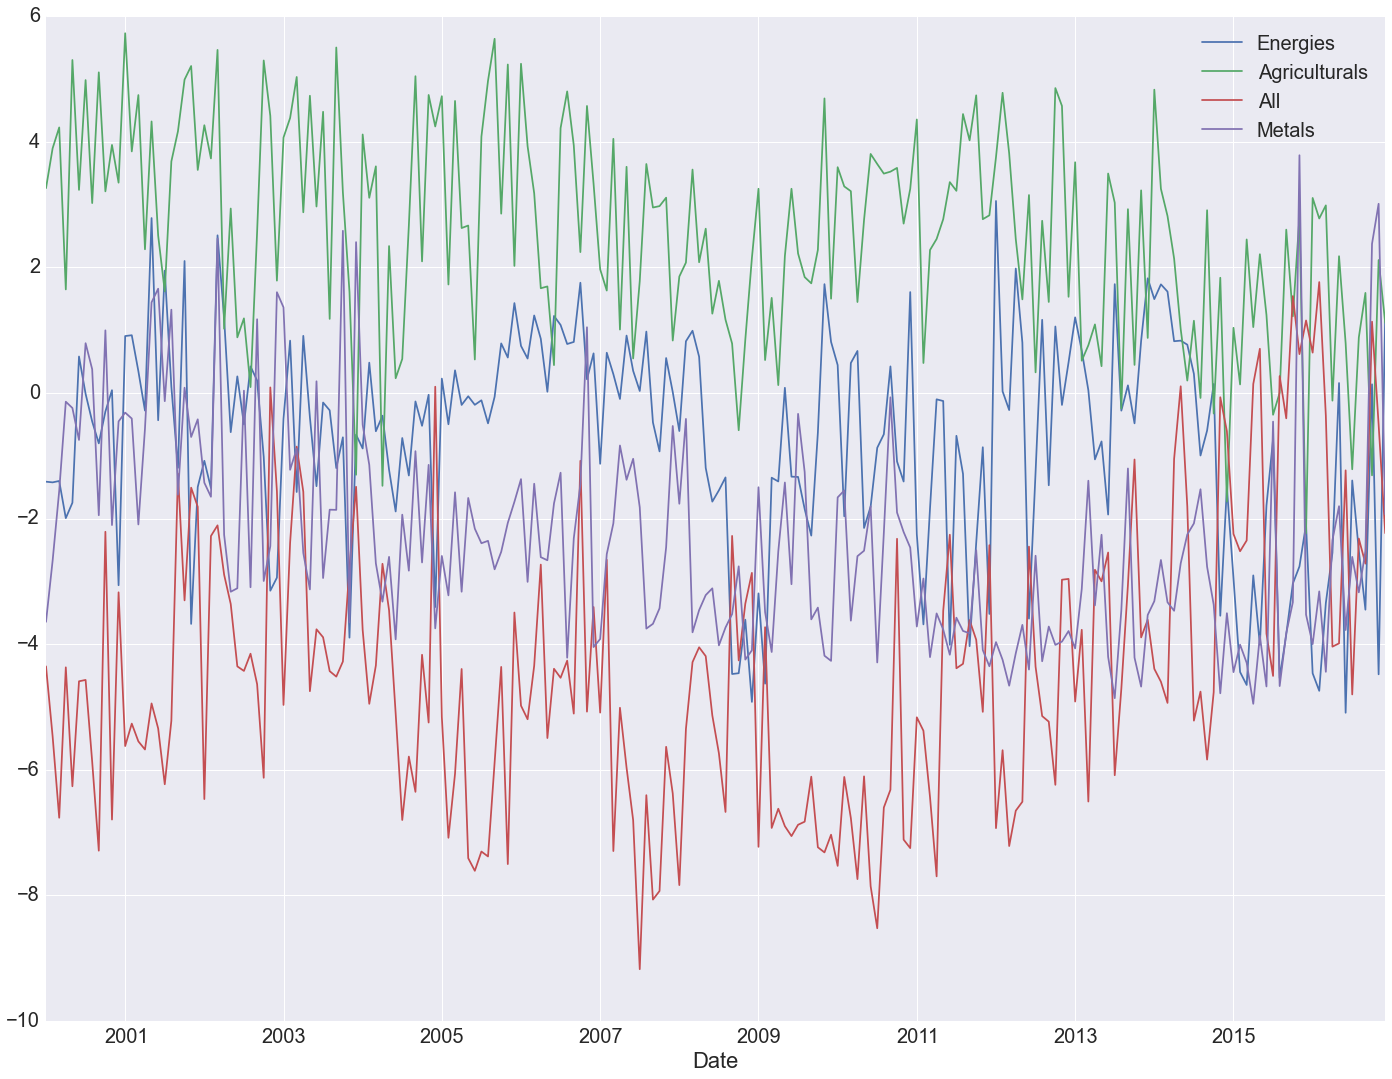

In [177]:
tcf_fht.plot()

In [238]:
temp=sector_XS_normalized(amihud['2000':'2016'],with_equity=True)

In [247]:
sector_zscores={}
for s in temp.keys():
    if len(temp[s]):
        sector_zscores[s]=temp[s]

In [249]:
sector_portfolio_sorts={}
for s in sector_zscores.keys():
    sector_portfolio_sorts[s]=quantile_portfolios_annual(sector_zscores[s],cleansed,3)
sector_portfolio_sorts['All']=quantile_portfolios_annual(amihud,cleansed,3)

In [250]:
factors=pd.DataFrame()
for s in sector_portfolio_sorts.keys():
    factors[s]=sector_portfolio_sorts[s]['2']-sector_portfolio_sorts[s]['0']

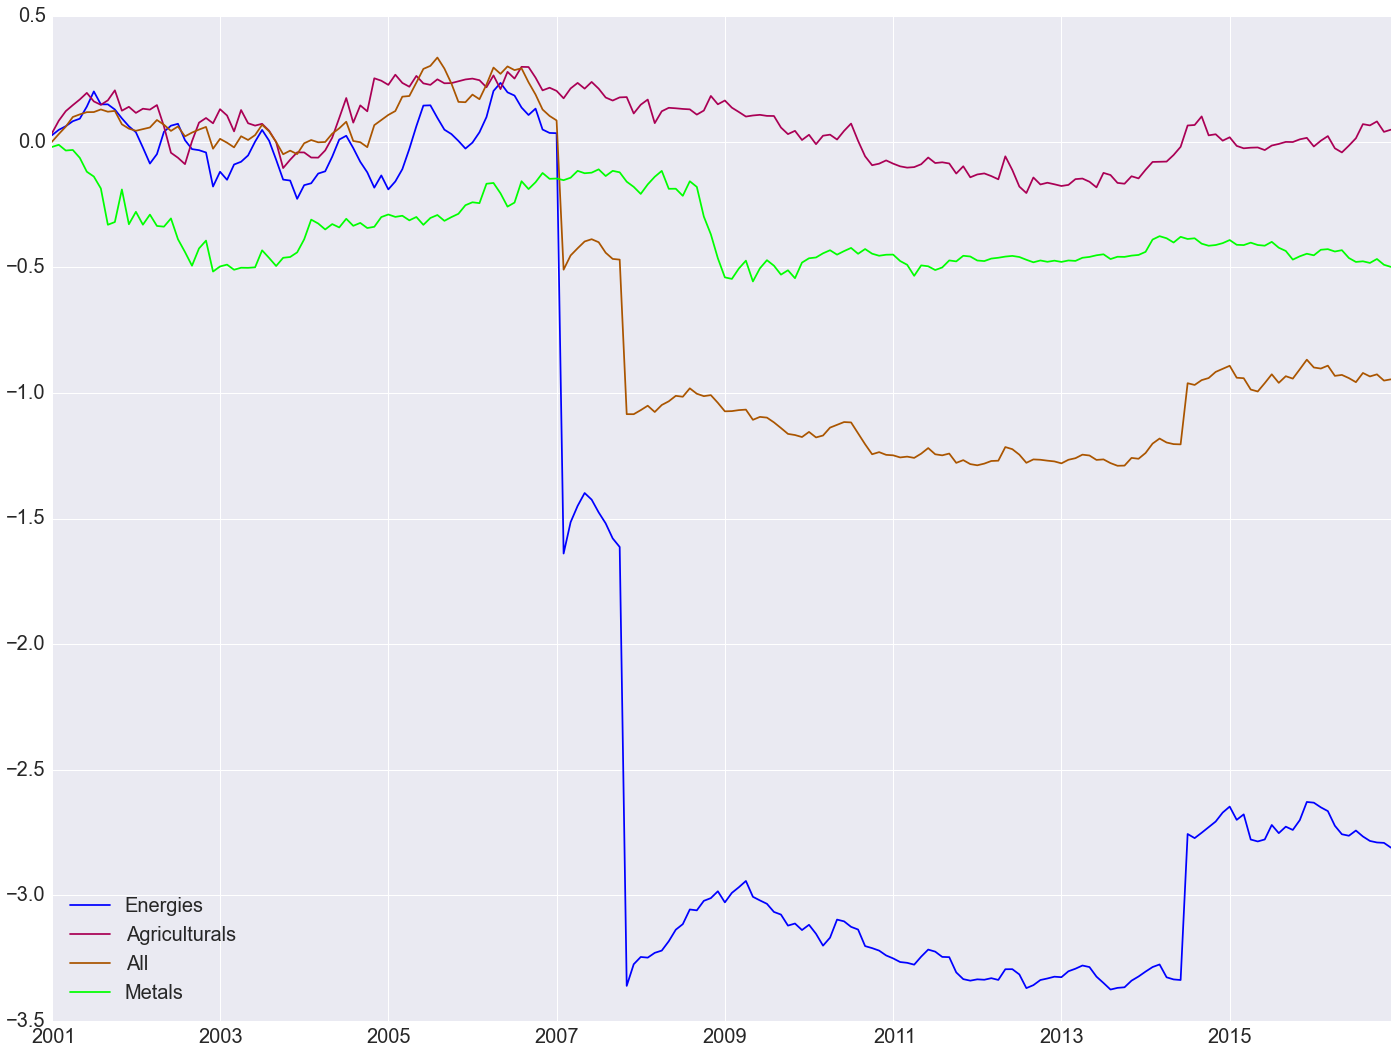

In [251]:
factors.cumsum().plot(colormap='brg')

# FHT annual


In [253]:
sector_portfolio_sorts_FHT={}
for s in sectors_FHT.keys():
    sector_portfolio_sorts_FHT[s]=quantile_portfolios_annual(sectors_FHT[s],cleansed,3)
sector_portfolio_sorts_FHT['All']=quantile_portfolios_annual(FHT_extra,cleansed,3)

In [255]:
factors_FHT=pd.DataFrame()
for s in sector_portfolio_sorts.keys():
    factors_FHT[s]=sector_portfolio_sorts_FHT[s]['2']-sector_portfolio_sorts_FHT[s]['0']

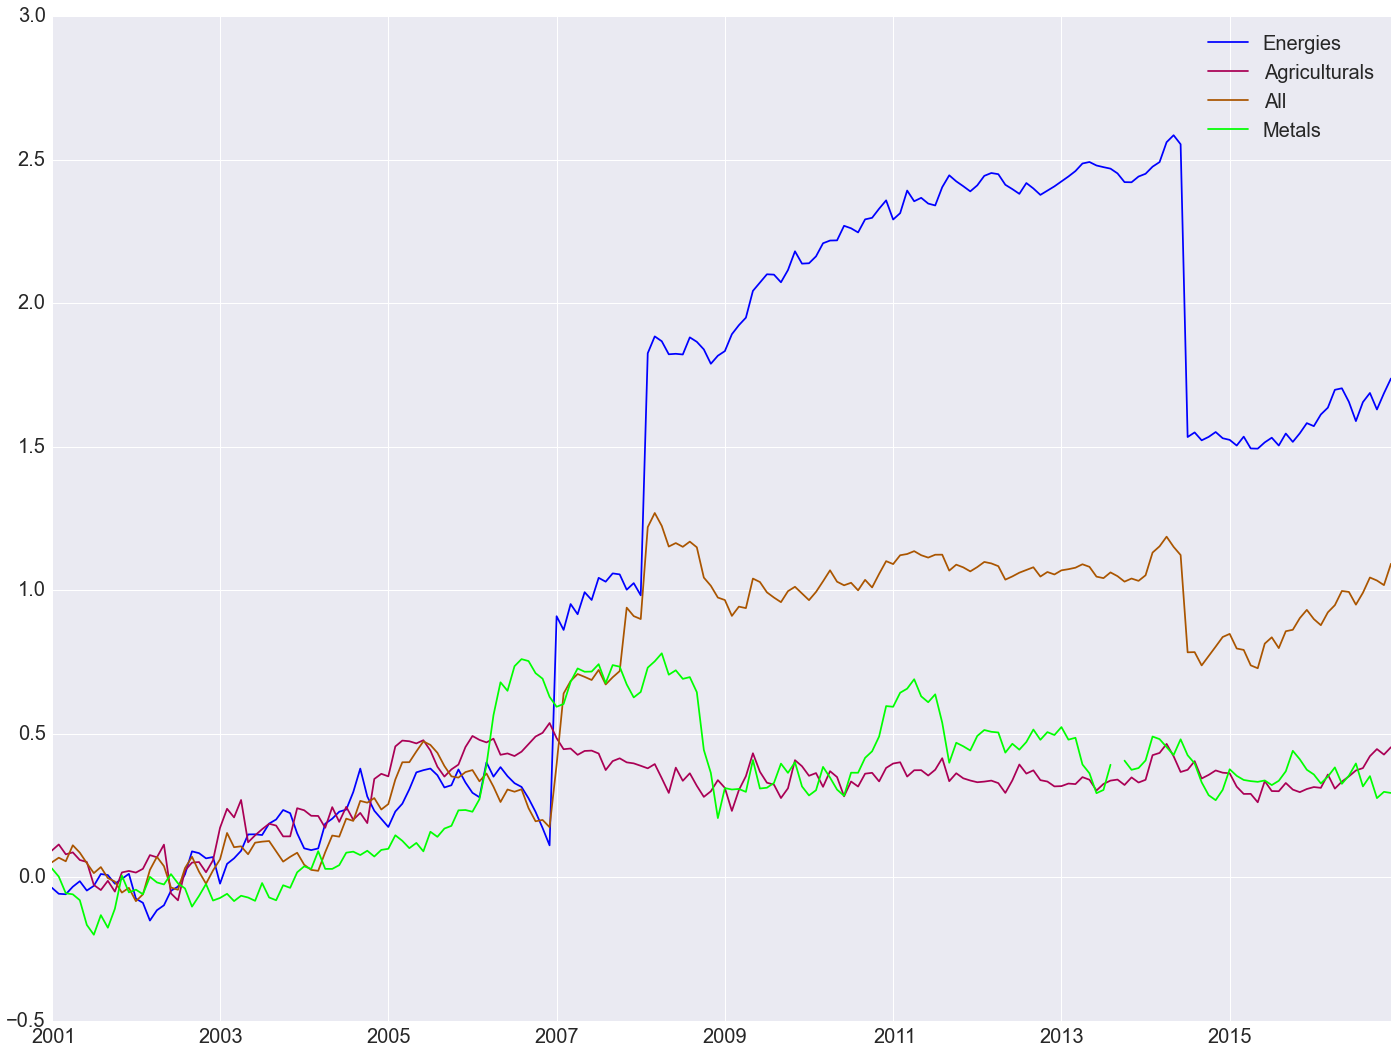

In [256]:
factors_FHT.cumsum().plot(colormap='brg')